## 1. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



## 2. Import Data (Data Collection)

In [2]:
car=pd.read_csv('..\\may 5 batch codes\\Data files\\cars.csv')

In [3]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
car.shape

(81, 5)

In [5]:
car.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
car.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

### 3.2 Check Assumption Test

#### 3.2.1 Linearity Test

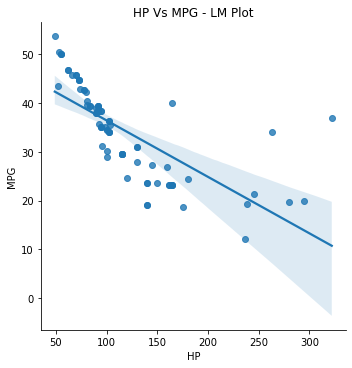

In [7]:
sns.lmplot(x='HP', y='MPG', data=car)
plt.title ('HP Vs MPG - LM Plot')
plt.show()

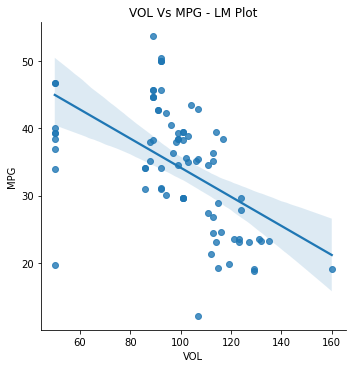

In [8]:
sns.lmplot(x='VOL', y='MPG', data=car)
plt.title ('VOL Vs MPG - LM Plot')
plt.show()

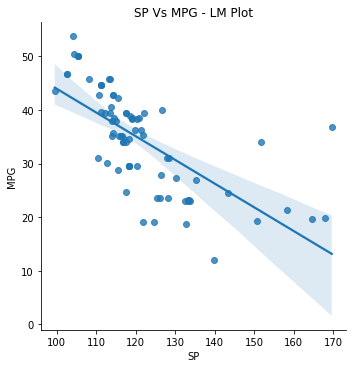

In [9]:
sns.lmplot(x='SP', y='MPG', data=car)
plt.title ('SP Vs MPG - LM Plot')
plt.show()

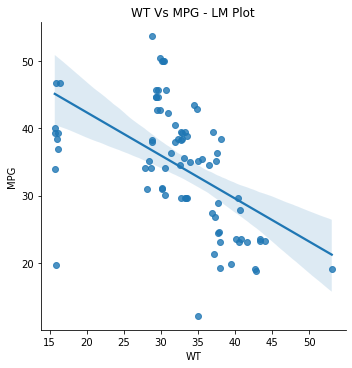

In [10]:
sns.lmplot(x='WT', y='MPG', data=car)
plt.title ('WT Vs MPG - LM Plot')
plt.show()

#### Linearity Test is failed

#### 3.2.2 Normality Test Using Displot

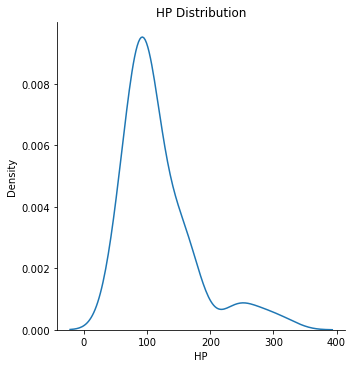

In [11]:
sns.displot(data=car,x='HP',kind='kde')
plt.title('HP Distribution')
plt.show()

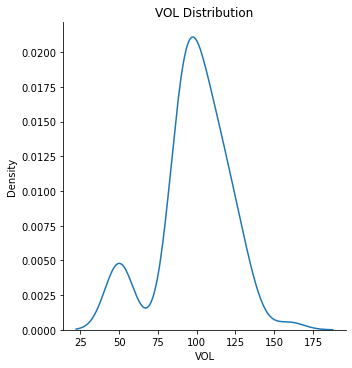

In [12]:
sns.displot(data=car,x='VOL',kind='kde')
plt.title('VOL Distribution')
plt.show()

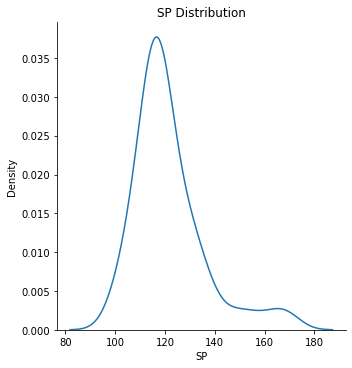

In [13]:
sns.displot(data=car,x='SP',kind='kde')
plt.title('SP Distribution')
plt.show()

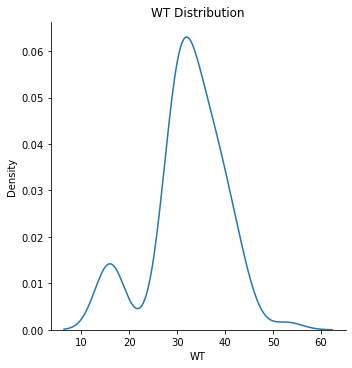

In [14]:
sns.displot(data=car,x='WT',kind='kde')
plt.title('WT Distribution')
plt.show()

#### Normality Test using QQPlot or Probability Test

In [15]:
from scipy import stats

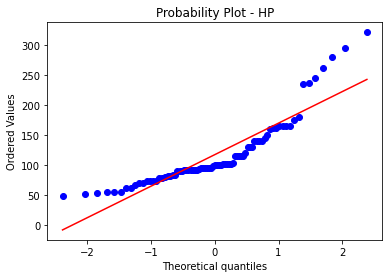

In [16]:
stats.probplot(x=car['HP'],dist='norm',plot=plt)
plt.title('Probability Plot - HP')
plt.show()

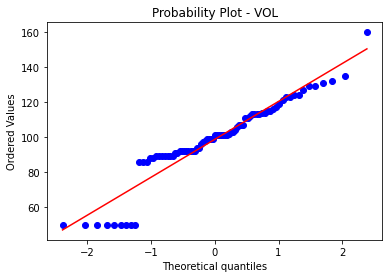

In [17]:
stats.probplot(x=car['VOL'],dist='norm',plot=plt)
plt.title('Probability Plot - VOL')
plt.show()

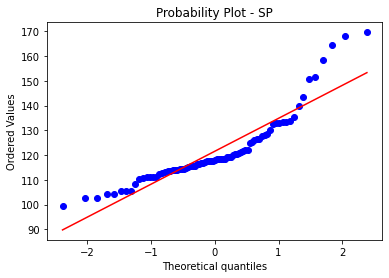

In [18]:
stats.probplot(x=car['SP'],dist='norm',plot=plt)
plt.title('Probability Plot - SP')
plt.show()

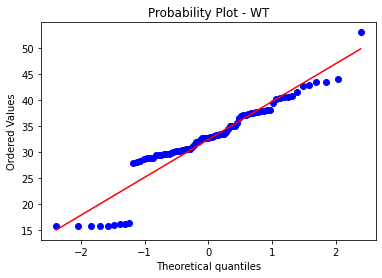

In [19]:
stats.probplot(x=car['WT'],dist='norm',plot=plt)
plt.title('Probability Plot - WT')
plt.show()

#### Normality Test is Failed

### 3.2.3 Multicollinearity Test

Can be tested by using below 2 Methods

1. Correlation Matrix
2. Variation Inflation Factor (VIF)

### 3.2.3.1 Correlation Matrix

In [20]:
cars_corr=car.corr().round(2)
cars_corr

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


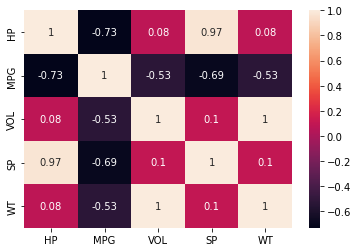

In [21]:
sns.heatmap(data=cars_corr,annot=True)
plt.show()

#### There is Multicollinearity in this Data. Hence Multicollinearity Test is Failed

### 3.2.4. No Auto Regression

#### Yes, There is no Auto Regression. There is no time based inputs in the data

### 3.2.5 Homoscedasticity Test  || 3.2.6 Zero Residual Mean Test

#### These tests can be performed after Model Training

## 4. Model Building

In [22]:
X=car.drop(columns='MPG',axis=1)
y=car[['MPG']]

## 5. Model Training

In [23]:
from sklearn.linear_model import LinearRegression
Linear_Model=LinearRegression()
Linear_Model.fit(X,y)

LinearRegression()

In [24]:
Linear_Model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [25]:
Linear_Model.intercept_

array([30.67733585])

## 6. Model Testing

In [26]:
y_pred=Linear_Model.predict(X)

## 7. Model Evaluation

In [27]:
error = y-y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


### .... Back to Assumptions

### 3.2.5 Homoscedasticity Test

* Each Input Feature Vs Error - Similar variance across zero error
* Make sure all the input features are in a similar scale

In [28]:
X.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=scaled_X,columns=X.columns)
scaled_X

,HP,VOL,SP,WT
0,0.000000,0.354545,0.065975,0.349986
1,0.021978,0.381818,0.084193,0.395709
2,0.021978,0.381818,0.084193,0.388381
3,0.076923,0.381818,0.198424,0.400142
4,0.014652,0.381818,0.069914,0.380215
...,...,...,...,...
76,1.000000,0.000000,1.000000,0.011267
77,0.692308,0.590909,0.728388,0.595690
78,0.783883,0.000000,0.742981,0.001523
79,0.901099,0.627273,0.976382,0.635921


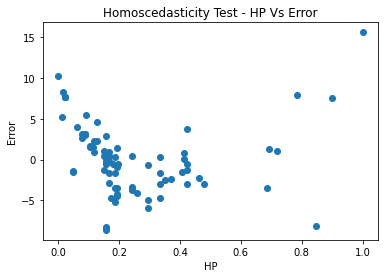

In [30]:
plt.scatter(x=scaled_X['HP'],y=error)
plt.title('Homoscedasticity Test - HP Vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

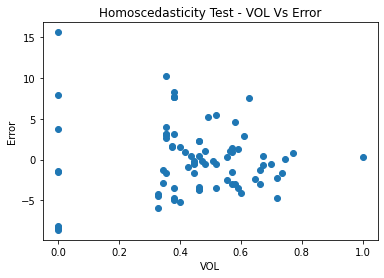

In [31]:
plt.scatter(x=scaled_X['VOL'],y=error)
plt.title('Homoscedasticity Test - VOL Vs Error')
plt.xlabel('VOL')
plt.ylabel('Error')
plt.show()

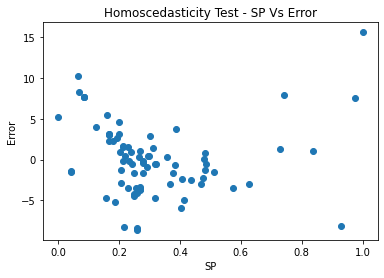

In [32]:
plt.scatter(x=scaled_X['SP'],y=error)
plt.title('Homoscedasticity Test - SP Vs Error')
plt.xlabel('SP')
plt.ylabel('Error')
plt.show()

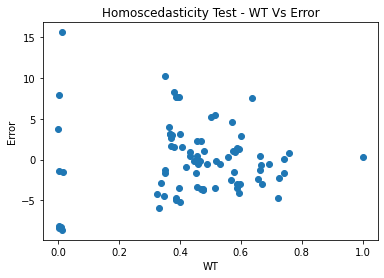

In [33]:
plt.scatter(x=scaled_X['WT'],y=error)
plt.title('Homoscedasticity Test - WT Vs Error')
plt.xlabel('WT')
plt.ylabel('Error')
plt.show()

#### Homoscedasticity is Failed. There is Heteroscedasticity

### 3.2.6 Zero Residual Mean Test

It is a plot between actual output vs predicted output

Expectation : Perfect Linear Relationship

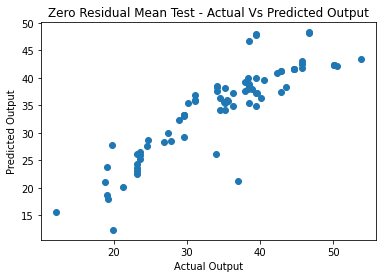

In [34]:
plt.scatter(y,y_pred)
plt.title("Zero Residual Mean Test - Actual Vs Predicted Output")
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Linear Regression Using Statsmodels for Understanding Evaluation Metrics

In [35]:
import statsmodels.formula.api as smf
stats_model = smf.ols('MPG~ HP + VOL + SP + WT',data=car).fit()

In [36]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.54e-23
Time:                        23:01:57   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
stats_model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [38]:
stats_model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

#### Hypothesis Formula

* Ho : It is not a significant parameter
* Ha : It is a significant parameter

In [39]:
model_1=smf.ols('MPG~HP',data=car).fit()
print('AIC Value  : ',model_1.aic.round(2))
print('BIC Value  : ',model_1.bic.round(2))
print('R-square   : ',model_1.rsquared.round(4))
print('Adj.Rsquare: ',model_1.rsquared_adj.round(4))
model_1.pvalues<0.05

AIC Value  :  530.75
BIC Value  :  535.53
R-square   :  0.5257
Adj.Rsquare:  0.5197


Intercept    True
HP           True
dtype: bool

In [40]:
model_2=smf.ols('MPG~HP+VOL',data=car).fit()
print('AIC Value  : ',model_2.aic.round(2))
print('BIC Value  : ',model_2.bic.round(2))
print('R-square   : ',model_2.rsquared.round(4))
print('Adj.Rsquare: ',model_2.rsquared_adj.round(4))
model_2.pvalues<0.05

AIC Value  :  480.66
BIC Value  :  487.84
R-square   :  0.7507
Adj.Rsquare:  0.7443


Intercept    True
HP           True
VOL          True
dtype: bool

In [41]:
model_3=smf.ols('MPG~HP+VOL+SP',data=car).fit()
print('AIC Value  : ',model_3.aic.round(2))
print('BIC Value  : ',model_3.bic.round(2))
print('R-square   : ',model_3.rsquared.round(4))
print('Adj.Rsquare: ',model_3.rsquared_adj.round(4))
model_3.pvalues<0.05

AIC Value  :  475.99
BIC Value  :  485.57
R-square   :  0.7704
Adj.Rsquare:  0.7614


Intercept    True
HP           True
VOL          True
SP           True
dtype: bool

In [42]:
model_4=smf.ols('MPG~HP+VOL+SP+WT',data=car).fit()
print('AIC Value  : ',model_4.aic.round(2))
print('BIC Value  : ',model_4.bic.round(2))
print('R-square   : ',model_4.rsquared.round(4))
print('Adj.Rsquare: ',model_4.rsquared_adj.round(4))
model_4.pvalues<0.05

AIC Value  :  477.93
BIC Value  :  489.9
R-square   :  0.7705
Adj.Rsquare:  0.7585


Intercept     True
HP            True
VOL          False
SP            True
WT           False
dtype: bool

### Linear Regression using sklearn for understanding Evaluation Metrics

#### Model Building

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((64, 4), (17, 4), (64, 1), (17, 1))

#### Model Training

In [45]:
new_model = LinearRegression()
new_model.fit(X_train,y_train)

LinearRegression()

#### Model Testing || Model Evaluation

#### Training Data

In [46]:
y_train_pred=new_model.predict(X_train)

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_train,y_train_pred),mean_squared_error(y_train,y_train_pred))

3.3554914028814506 19.136456810926465


#### Testing Data

In [48]:
y_test_pred = new_model.predict(X_test)

In [49]:
print(mean_absolute_error(y_test,y_test_pred),mean_squared_error(y_test,y_test_pred))

3.5962462421802313 23.457874597619092


### Data Transformation

In [50]:
import numpy as np

In [51]:
car1=car.copy()

In [52]:
car1['log_HP']=np.log(car1['HP'])
car1['log_VOL']=np.log(car1['VOL'])
car1['log_SP']=np.log(car1['SP'])
car1['log_WT']=np.log(car1['WT'])

In [53]:
car1

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


### Performing Linearity Test

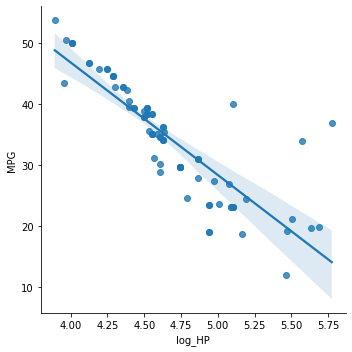

In [54]:
sns.lmplot(x='log_HP',y='MPG',data=car1)
plt.show()

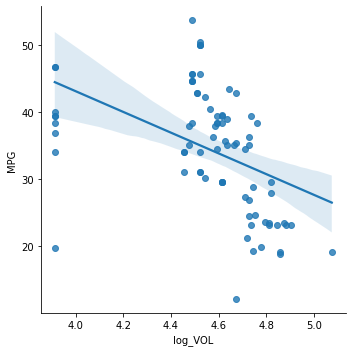

In [55]:
sns.lmplot(x='log_VOL',y='MPG',data=car1)
plt.show()

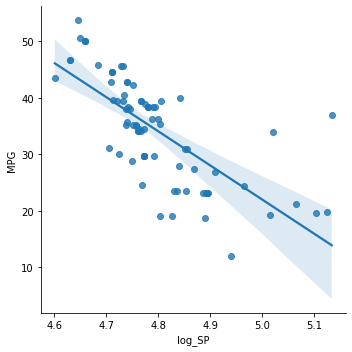

In [56]:
sns.lmplot(x='log_SP',y='MPG',data=car1)
plt.show()

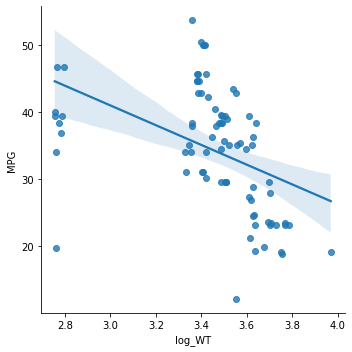

In [57]:
sns.lmplot(x='log_WT',y='MPG',data=car1)
plt.show()

In [58]:
log_model_1=smf.ols('MPG~log_HP',data=car1).fit()
print('AIC Value  : ',log_model_1.aic.round(2))
print('BIC Value  : ',log_model_1.bic.round(2))
print('R-square   : ',log_model_1.rsquared.round(4))
print('Adj.Rsquare: ',log_model_1.rsquared_adj.round(4))
log_model_1.pvalues<0.05

AIC Value  :  490.5
BIC Value  :  495.29
R-square   :  0.7114
Adj.Rsquare:  0.7078


Intercept    True
log_HP       True
dtype: bool

In [59]:
log_model_2=smf.ols('MPG~log_HP+log_VOL',data=car1).fit()
print('AIC Value  : ',log_model_2.aic.round(2))
print('BIC Value  : ',log_model_2.bic.round(2))
print('R-square   : ',log_model_2.rsquared.round(4))
print('Adj.Rsquare: ',log_model_2.rsquared_adj.round(4))
log_model_2.pvalues<0.05

AIC Value  :  444.03
BIC Value  :  451.22
R-square   :  0.8414
Adj.Rsquare:  0.8373


Intercept    True
log_HP       True
log_VOL      True
dtype: bool

In [60]:
log_model_3=smf.ols('MPG~log_HP+log_VOL+log_SP',data=car1).fit()
print('AIC Value  : ',log_model_3.aic.round(2))
print('BIC Value  : ',log_model_3.bic.round(2))
print('R-square   : ',log_model_3.rsquared.round(4))
print('Adj.Rsquare: ',log_model_3.rsquared_adj.round(4))
log_model_3.pvalues<0.05

AIC Value  :  399.1
BIC Value  :  408.68
R-square   :  0.9111
Adj.Rsquare:  0.9077


Intercept    True
log_HP       True
log_VOL      True
log_SP       True
dtype: bool

In [61]:
log_model_4=smf.ols('MPG~log_HP+log_VOL+log_SP+log_WT',data=car1).fit()
print('AIC Value  : ',log_model_4.aic.round(2))
print('BIC Value  : ',log_model_4.bic.round(2))
print('R-square   : ',log_model_4.rsquared.round(4))
print('Adj.Rsquare: ',log_model_4.rsquared_adj.round(4))
log_model_4.pvalues<0.05

AIC Value  :  400.5
BIC Value  :  412.47
R-square   :  0.9118
Adj.Rsquare:  0.9071


Intercept     True
log_HP        True
log_VOL      False
log_SP        True
log_WT       False
dtype: bool

## Residual Plots

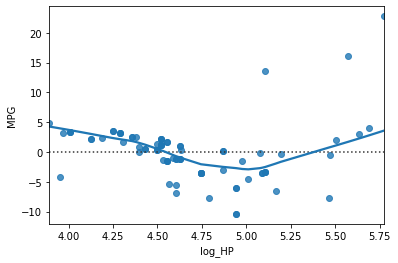

In [62]:
sns.residplot(x='log_HP',y='MPG',data=car1,lowess=True)
plt.show()

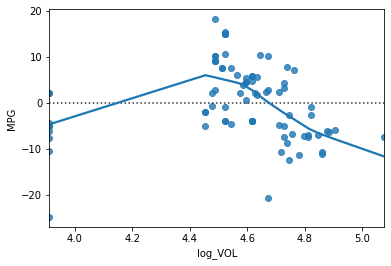

In [63]:
sns.residplot(x='log_VOL',y='MPG',data=car1,lowess=True)
plt.show()

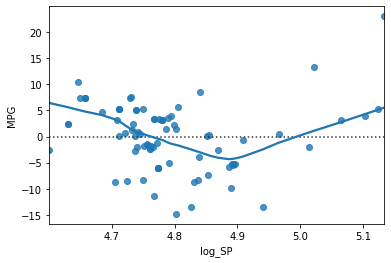

In [64]:
sns.residplot(x='log_SP',y='MPG',data=car1,lowess=True)
plt.show()

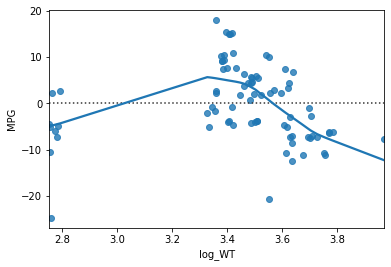

In [65]:
sns.residplot(x='log_WT',y='MPG',data=car1,lowess=True)
plt.show()

#### Variance Inflation Factor

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#### Cook's Distance

In [67]:
model_influence = log_model_3.get_influence()
(c,_)=model_influence.cooks_distance

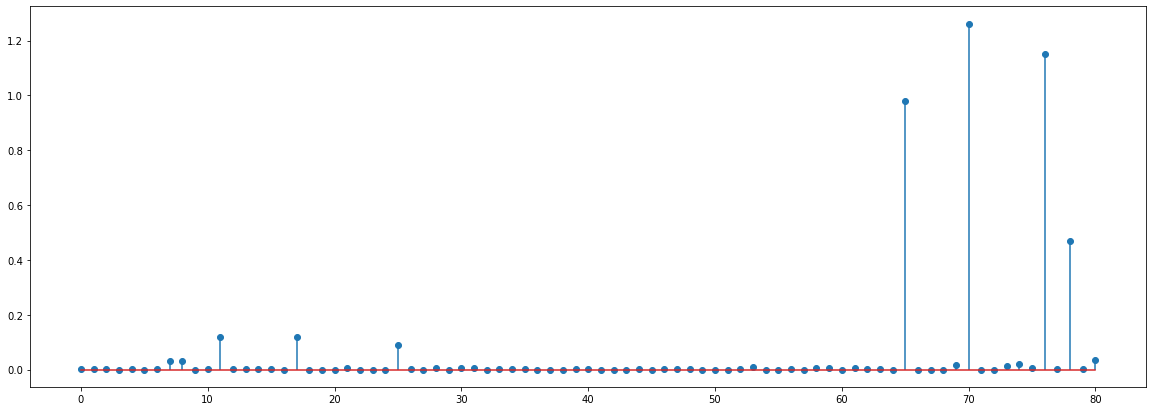

In [68]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c,3))
plt.show()

In [69]:
(np.argmax(c),np.max(c))

(70, 1.2620875804269)

#### Influence Points

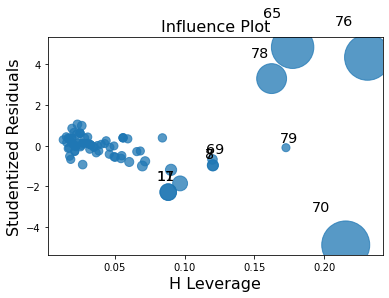

In [70]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(log_model_3)
plt.show()

In [71]:
car1.shape

(81, 9)

In [72]:
k = car1.shape[1]
n = car1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.37037037037037035

## End